# Bikesharing Investigation
## by Marc Nguyen
<BR><BR>

## Investigation Overview

> In this investigation, I will be exploring Ford's GoBike bike sharing program in San Francisco, California.  GoBike is a program develop by Ford to provide an alternative means of transportation for getting around town.  You can simply rent a bike to ride around town for leisure or use it as a form of commute to work.<br><br>
I will be using the dataset to paint a picture of what type of customer is using the program and how they are using it.

## Dataset Overview

> The dataset provides information on the bike trip with information on when and where the bike rental starts and stops.  It also provides information the customer with information like age, user type, and gender.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_clean.csv')

In [5]:
# convert start time and end time to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [6]:
# convert start time column into 3 columns of month weekofyear and weekday
df['month'] = df.start_time.dt.month
df['weekofyear'] = df.start_time.dt.weekofyear
df['weekday'] = df.start_time.dt.weekday_name
df['hour'] = df.start_time.dt.hour

In [7]:
# convert user_type and member_gender into category format
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [9]:
# convert duration time to minutes
df['duration_min'] = df['duration_sec'] / 60
df.duration_min = df.duration_min.astype(int)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The main core of the customer base for Ford's GoBike bike sharing program are male Millennials who uses the service on a daily basis.  From the analysis, 69% of bike renters are male, 60% are Millennials, and 85% pay on a subscription basis.

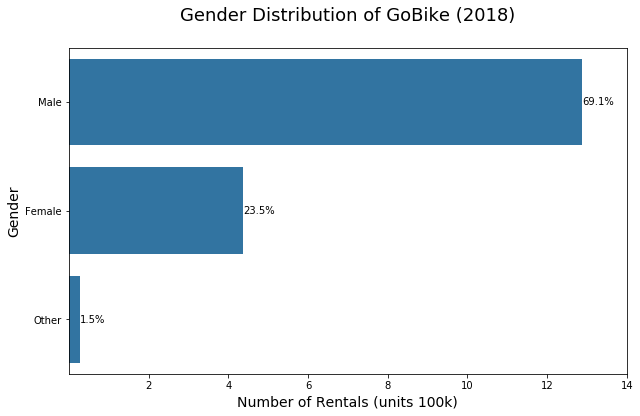

In [26]:
# POLISHING
n_gender = df.shape[0]
gender_count = df.member_gender.value_counts()
gender_count[0], gender_count[1] = gender_count[1], gender_count[0]

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='member_gender', color=base_color, order=df.member_gender.value_counts().index);
plt.title('Gender Distribution of GoBike (2018)\n', fontsize=18);
plt.xlabel('Number of Rentals (units 100k)', fontsize=14)
plt.ylabel('Gender', fontsize=14);
ticks = [2, 4, 6, 8, 10, 12, 14]
ticks_units = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
plt.xticks(ticks_units, ticks);

for i in range(gender_count.shape[0]):
    count = gender_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    plt.text(count+1, i, pct_string, va='center');

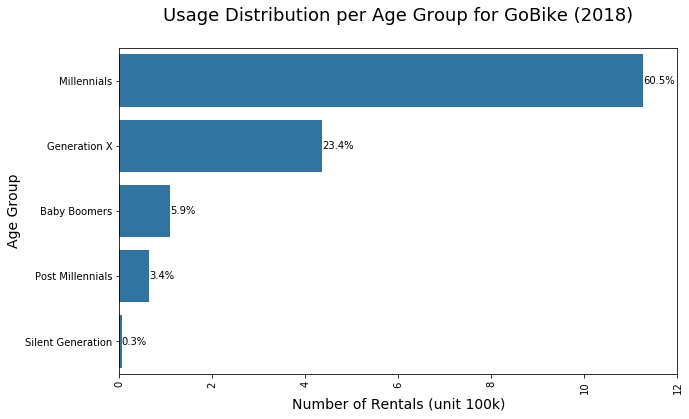

In [22]:
# POLISHING
# define function to categorize birth year into age groups as defined by Pew Research group
def gen(row):
    if row['member_birth_year'] <= 1945:
        return 'Silent Generation'
    elif row['member_birth_year'] <= 1964:
        return 'Baby Boomers'
    elif row['member_birth_year'] <= 1980:
        return 'Generation X'
    elif row['member_birth_year'] <= 1996:
        return 'Millennials'
    else:
        return 'Post Millennials'

df_gen = df.dropna()
df_gen['age_group'] = df_gen.apply(gen, axis=1)
plt.figure(figsize=(10,6))
sb.countplot(data=df_gen, y='age_group', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution per Age Group for GoBike (2018)\n', fontsize=18)
plt.ylabel('Age Group', fontsize=14)
plt.xlabel('Number of Rentals (unit 100k)', fontsize=14)

xticks = np.arange(0, 13, 2)
xticks_units = xticks*100000
plt.xticks(xticks_units, xticks);

n_user = df.shape[0]
user_count = df_gen.age_group.value_counts()

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_user)
    plt.text(count+1, i, pct_string, va='center');

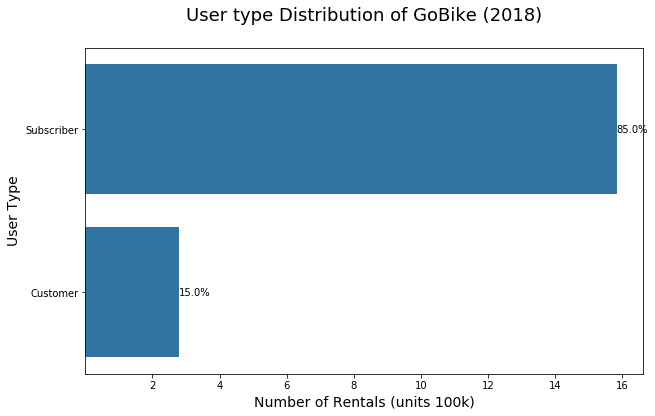

In [28]:
# POLISHING
n_user = df.shape[0]
user_count = df.user_type.value_counts()
user_count[0], user_count[1] = user_count[1], user_count[0]

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='user_type', color=base_color, order=df.user_type.value_counts().index);
plt.title('User type Distribution of GoBike (2018)\n', fontsize=18);
plt.xlabel('Number of Rentals (units 100k)',fontsize=14)
plt.ylabel('User Type',fontsize=14);
ticks = [2, 4, 6, 8, 10, 12, 14, 16]
ticks_units = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000]
plt.xticks(ticks_units, ticks);

for i in range(user_count.shape[0]):
    count = user_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_user)
    plt.text(count+1, i, pct_string, va='center');

## (Visualization 2)

> We know who is using the service.  As for the purpose, the core of the business is for commuting to work.  We could see this by the high usage during Monday to Friday and consistent throughout the week.  We also could see this by the peak usage during peak commute hours of 7am to 9am and 4pm to 6pm.

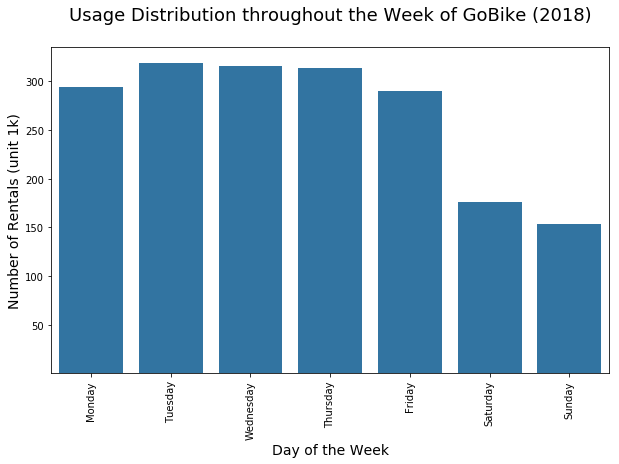

In [24]:
# create order categorical format for day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_category = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df.weekday = df.weekday.astype(days_category)

#POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the Week of GoBike (2018)\n', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rentals (unit 1k)', fontsize=14);
yticks = [50, 100, 150, 200, 250, 300]
yticks_units = [50000, 100000, 150000, 200000, 250000, 300000]
plt.yticks(yticks_units, yticks);

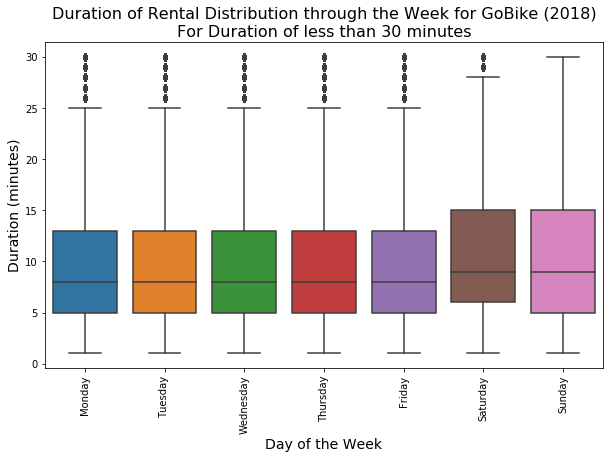

In [21]:
# POLISHING
# query only 30  mins or less
df30 = df.query('duration_min <= 30')
plt.figure(figsize=(10,6))
sb.boxplot(data=df30, x='weekday', y='duration_min');
plt.xticks(rotation=90);
plt.title('Duration of Rental Distribution through the Week for GoBike (2018)\nFor Duration of less than 30 minutes', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14);

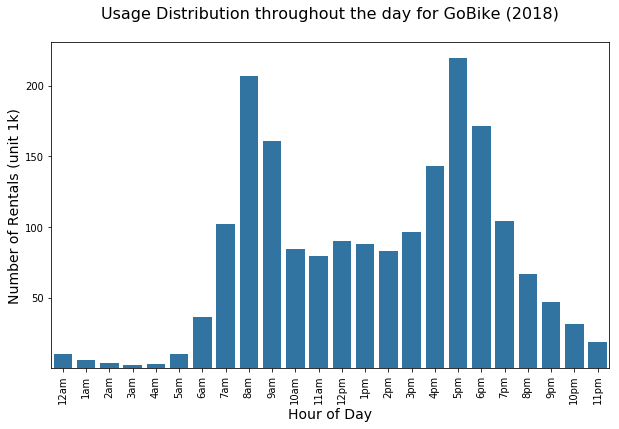

In [25]:
# POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='hour', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the day for GoBike (2018)\n', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Rentals (unit 1k)', fontsize=14)
ticks = np.arange(0,24,1)
ticks_units = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xticks(ticks, ticks_units);
yticks = [50, 100, 150, 200]
yticks_units = [50000, 100000, 150000, 200000]
plt.yticks(yticks_units, yticks);

## (Visualization 3)

> In the final visualization, I found that the bike sharing service is mainly used during dry warm months of San Francisco, California, with the exception of increase in usage during Christmas shopping period.

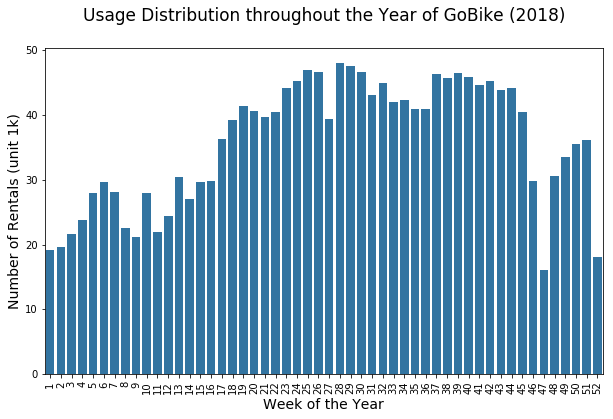

In [27]:
# POLISHING
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='weekofyear', color=base_color);
plt.xticks(rotation=90);
plt.title('Usage Distribution throughout the Year of GoBike (2018)\n', fontsize=17)
plt.xlabel('Week of the Year', fontsize=14)
plt.ylabel('Number of Rentals (unit 1k)', fontsize=14)

yticks = np.arange(0, 51, 10)
yticks_units = yticks*1000
plt.yticks(yticks_units, yticks);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!